# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Your code here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm  
from scipy.optimize import curve_fit

student_data = pd.DataFrame({'StudentID':[1,2,3,4,5,6,7,8,9,10],'Age':[17,51,27,21,36,48,19,26,54,30],
                            'Tardies':[10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

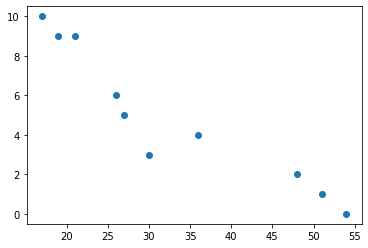

In [2]:
# Your code here.
plt.scatter(y=student_data['Tardies'], x=student_data['Age'])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [3]:
# Your response here. 
"""
-We see a negative trend where the younger is the subject, more tardies it has
-the younger is someone more propense to arrive late to class?
"""

'\n-We see a negative trend where the younger is the subject, more tardies it has\n-the younger is someone more propense to arrive late to class?\n'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# Your response here.
#correlation:
display(student_data[['Age','Tardies']].corr())
"""we see the tardies/age correlation is negative value, very close to -1 this indicates that the age has a 
great influence in the tardiness"""
#covariance:
display(student_data[['Age','Tardies']].cov())
"""the results in the covariance between age and tardiness are a negative value, this indicates that 
the trend is negative"""

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


'the results in the covariance between age and tardiness are a negative value, this indicates that \nthe trend is negative'

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [5]:
# Your response here.
x= student_data['Age']
y= student_data['Tardies']

results = stats.linregress(x,y)
reg_line = results[1]+results[0]*x
print(results, '\n')
print(reg_line)
#in the previous plot we see the datapoints not drawing any curve, this means we can use a linear regression
# yi = mx + b
#in the previous statements we see a negative tendency, this is a crucial information because we know that m (the "inclination") is negative  

LinregressResult(slope=-0.2428207709159808, intercept=12.888803363135768, rvalue=-0.9391626886887121, pvalue=5.56665383455343e-05, stderr=0.03139728816158607) 

0    8.760850
1    0.504944
2    6.332643
3    7.789567
4    4.147256
5    1.233406
6    8.275209
7    6.575463
8   -0.223518
9    5.604180
Name: Age, dtype: float64


Plot your regression model on your scatter plot.

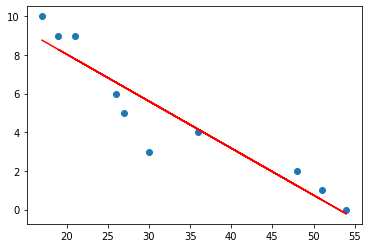

In [6]:
# Your code here.
plt.plot(x, reg_line, c= 'red')
plt.scatter(x,y)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [7]:
#Your response here. 
"""
For this sample, we can conclude that age is a good predictor of tardiness due the negative correlation that         
it is presented. 
"""

'\nFor this sample, we can conclude that age is a good predictor of tardiness due the negative correlation that         \nit is presented. \n'

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [8]:
# Import any libraries you may need & the data
df = pd.read_csv(r'C:\Users\Sebas!\Documents\GitHub\lab-regression-analysis\your-code\vehicles.csv')
df

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

<AxesSubplot:>

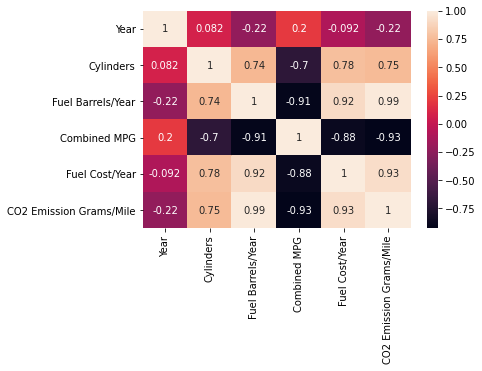

In [9]:
# Your response here. 
var = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year','CO2 Emission Grams/Mile']
out = 'CO2 Emission Grams/Mile'
df[var]
sns.heatmap(df[var].corr(),annot=True)

#The results indicates that the Fuel Barrels/Year, Fuel Cost/Year and Cylinders can provide helpful information    
#The Year and Combined MPG,doesn't provide enough information


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [44]:
# Your response here. 
"""Thor the previous data points metioned I'm going to use linear regression"""
slope =[]
intercept =[]

for n in var:
    parameters = stats.linregress(df[out],df[n])
    slope.append(parameters[0])
    intercept.append(parameters[1])


In [50]:
# Your response here. 
sumary_reg = pd.DataFrame(data={'Slope':slope,'Intercept':intercept},index=var)
print('summary regression using CO2 Emission Grams/Mile as our constant')
sumary_reg.transpose()

summary regression using CO2 Emission Grams/Mile as our constant


,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Slope,-0.018830,0.011092,0.037003,-0.039772,3.963607,1.0
Intercept,2009.666772,0.492752,0.021014,38.833510,8.631275,0.0


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [36]:
# Your code here.
X = [1,3,4,6,8,9,11,14]
Y= [1,2,4,4,5,7,8,13]


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

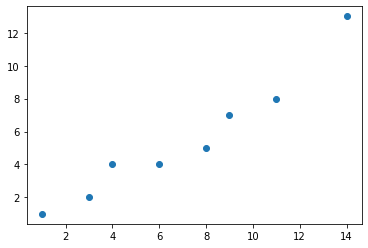

In [37]:
# Your code here.
#parameters = stats.linregress(X,Y)
#linregpoints= parameters[0]*X+parameters[1]
#plt.plot(X,linregpoints,'r')
plt.scatter(X,Y)


What do you see? What does this plot tell you about the likely relationship between the variables? Print the resultsfrom your regression.

0.9316696375519905
[0.84848485]


'\nThe plot indicates that there is some relationship between the ammoun of people that arrives and the ones who                    \nare invited, makes sense because the more you invite, the more people might attend to the party\n'

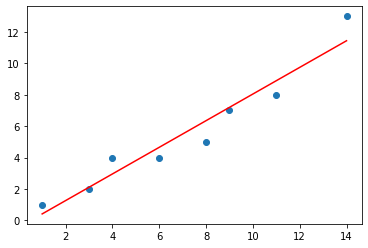

In [51]:
# Your response here. 
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
X = np.array(X).reshape(-1, 1)
model = LR.fit(X,Y)
print(LR.score(X,Y))
print(LR.coef_)
plt.scatter(X,Y)
plt.plot(X,X*LR.coef_+LR.intercept_, 'r')
"""
The plot indicates that there is some relationship between the ammoun of people that arrives and the ones who                    
are invited, makes sense because the more you invite, the more people might attend to the party
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

0.9433811802232855
[0.68421053]
[[ 1]
 [ 3]
 [ 4]
 [ 6]
 [ 8]
 [ 9]
 [11]] [1, 2, 4, 4, 5, 7, 8]


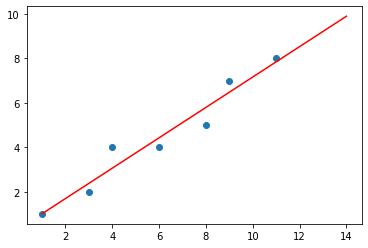

In [54]:
# Your response here. 
"""Looking at the graph, seems like the most problematic point is (14,13) because it is an outlier """    
LR = LinearRegression()
X = np.array(X).reshape(-1, 1)
model = LR.fit(X[:-1],Y[:-1])
print(LR.score(X[:-1],Y[:-1]))
print(LR.coef_)
plt.scatter(X[:-1],Y[:-1])
plt.plot(X,X*LR.coef_+LR.intercept_, 'r')

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
"""
The difference relies in the slope
For each person invited to the party 0,84 people attend, but without the outlier   
for each person invited to the party 0,68 people attend by looking at the slope
"""            
